In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import random

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Importing CSV file
df = pd.read_csv('Customer-Churn-Records.csv')
pd.set_option('display.max_rows', None)
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0,0,3,GOLD,791
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,3,GOLD,369
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0,0,5,SILVER,560
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,5,DIAMOND,715
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,4,PLATINUM,311
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [3]:
df = df.drop(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned'], axis=1)

In [4]:
# df = df[:5000]

# Adding ServiceUsage data

In [5]:
# df['Service Usage'] = np.random.randint(5000, 20000, df.shape[0])

In [6]:
df.head()

,CustomerId,Age,Tenure,HasCrCard,Exited
0,15634602,42,2,1,1
1,15647311,41,1,0,0
2,15619304,42,8,1,1
3,15701354,39,1,0,0
4,15737888,43,2,1,0


In [7]:
# Split the text in each row inside the DataFrame, then add a random data for serviceUsage in a new column
# for index, row in df.iterrows():
#     serviceUsage = np.random.randint(1000, 10000)
#     df.loc[index, 'serviceUsage'] = int(serviceUsage)

In [8]:
df.head(10)

,CustomerId,Age,Tenure,HasCrCard,Exited
0,15634602,42,2,1,1
1,15647311,41,1,0,0
2,15619304,42,8,1,1
3,15701354,39,1,0,0
4,15737888,43,2,1,0
5,15574012,44,8,1,1
6,15592531,50,7,1,0
7,15656148,29,4,1,1
8,15792365,44,4,0,0
9,15592389,27,2,1,0


# Selecting and reading data

In [9]:
# X: age, salary
# Y: purchased
X = df.iloc[:, [0,1,2,3]].values
y = df.iloc[:, 4].values

In [10]:
X

array([[15634602,       42,        2,        1],
       [15647311,       41,        1,        0],
       [15619304,       42,        8,        1],
       ...,
       [15584532,       36,        7,        0],
       [15682355,       42,        3,        1],
       [15628319,       28,        4,        1]], dtype=int64)

In [11]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

# Training and test set

In [12]:
# Split the training and test set
# Common random states: 0 and 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state = 0)

In [13]:
X_train

array([[15634602,       42,        2,        1],
       [15647311,       41,        1,        0],
       [15619304,       42,        8,        1],
       ...,
       [15645820,       27,        7,        1],
       [15659031,       36,        8,        1],
       [15790113,       71,        6,        1]], dtype=int64)

In [14]:
y_train

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

# Standardization: Age and Salary

In [15]:
# Scaler: K-fold validations for noise
# KNN: classification; gets the distance; more understandable for the machine
# To prevent overfitting
# K-means: for clustering
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[-0.78502413,  0.29566966, -1.0457245 ,  0.65070731],
       [-0.60735463,  0.20019791, -1.39320284, -1.53678925],
       [-0.99888736,  0.29566966,  1.03914557,  0.65070731],
       ...,
       [-0.62819854, -1.13640666,  0.69166723,  0.65070731],
       [-0.44351118, -0.27716087,  1.03914557,  0.65070731],
       [ 1.38899115,  3.06435055,  0.34418888,  0.65070731]])

In [17]:
X_test

array([[-0.53776311,  0.77302843, -0.35076781,  0.65070731],
       [-1.19408754,  1.82321774,  1.03914557,  0.65070731],
       [ 0.09908744, -0.65904789,  1.73410227,  0.65070731],
       ...,
       [-1.48499355, -0.27716087,  0.69166723, -1.53678925],
       [-0.11744594,  0.29566966, -0.69824615,  0.65070731],
       [-0.87285931, -1.04093491, -0.35076781,  0.65070731]])

# Training the K-NN model on the Training Set

In [18]:
# Minkowski: matrix to measure the similarity between the two series points; distance
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

# Predicting a new result

In [19]:
print(classifier.predict(sc.transform([[15634602, 42, 2, 1]])))

[0]


In [20]:
# Not Equal is incorrect 0, 0 1,1 only
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 0]]


# Metric evaluation

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1918   90]
 [ 395   97]]


0.806

In [22]:
precision_score(y_test, y_pred)

0.5187165775401069

In [23]:
recall_score(y_test, y_pred)

0.19715447154471544

In [24]:
f1_score(y_test, y_pred)

0.2857142857142857

<Axes: >

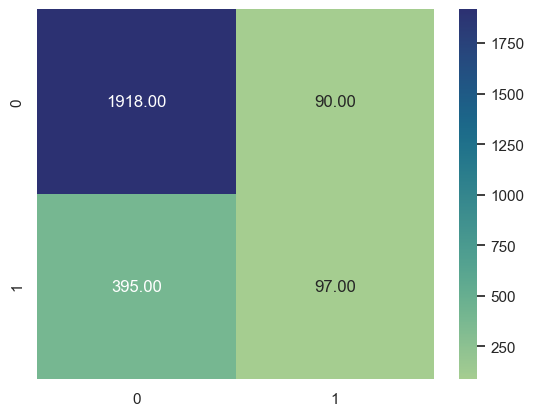

In [25]:
sns.set_theme(style='darkgrid', palette='mako', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.heatmap(cm, annot=True, fmt='.2f', cmap='crest')

# Data visualization

In [ ]:
# Training Set
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Assuming `sc` is your StandardScaler and `classifier` is your trained model

# Transform the training set back to the original scale
X_set, y_set = sc.inverse_transform(X_train), y_train

# Create a mesh grid for the decision boundary
X1, X2 = np.meshgrid(np.arange(start = X_set[:, [0,1,2,3,5]].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 4].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))

# Plot the decision boundary using contour plot
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Set the limits for the x and y axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the data points on the decision boundary
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                color = ListedColormap(('red', 'green'))(i), label = j)

# Add title and labels
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Display the plot
plt.show()

In [ ]:
X1

In [ ]:
# Test set
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Assuming `sc` is your StandardScaler and `classifier` is your trained model

# Transform the training set back to the original scale
X_set, y_set = sc.inverse_transform(X_test), y_test

# Create a mesh grid for the decision boundary
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))

# Plot the decision boundary using contour plot
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Set the limits for the x and y axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the data points on the decision boundary
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                color = ListedColormap(('red', 'green'))(i), label = j)

# Add title and labels
plt.title('K-NN (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Display the plot
plt.show()

# TEST CODES

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Assuming `sc` is your StandardScaler and `classifier` is your trained model

# Transform the training set back to the original scale
X_set, y_set = sc.inverse_transform(X_train), y_train

# Use only two features (e.g., columns 0 and 1) for the decision boundary plot
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))

# Plot the decision boundary using contour plot
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Set the limits for the x and y axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the data points on the decision boundary
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                color = ListedColormap(('red', 'green'))(i), label = j)

# Add title and labels (adjust labels to the features used in the plot)
plt.title('K-NN (Training set)')
plt.xlabel('Feature 1')  # Change 'Age' to the correct feature label
plt.ylabel('Feature 2')  # Change 'Estimated Salary
